In [ ]:
!pip install google-cloud-bigquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Connect to BigQuery
from google.colab import auth
auth.authenticate_user()

In [ ]:
#Output the dataset
from google.cloud import bigquery
client = bigquery.Client(project = 'ornate-ray-377720')

query = """
SELECT *
FROM `nypd_motor_vehicle_collisions.nypd_mv_collisions`
"""

query_job = client.query(query)

result_df = query_job.to_dataframe()

In [ ]:
#make everything to lower case
def lower_case(t):
  if t is None:
    return None
  else:
    return t.lower()

In [ ]:
#perform some text processing
import re
def convert_type(t):
  '''
  This method is to convert vehicle type into desired format
  '''
  if t is None:
    return None
  elif 'sedan' in t:
    return 'sedan'
  elif 'suv' in t:
    return 'suv'
  elif 'van' in t:
    return 'van'
  elif 'truck' in t:
    return 'truck'
  elif 'cab' in t:
    return 'cab'
  elif 'motorcycle' in t:
    return 'motorcycle'
  elif 'taxi' in t:
    return 'cab'
  elif 'bus' in t:
    return 'bus'
  elif 'pk' in t:
    return 'truck'
  elif 'ambulance' in t:
    return 'ambulance'
  elif re.search(r"bike.\w*e" , t):
    return 'e-bike'
  elif re.search(r"scooter.\w*e" , t):
    return 'e-bike'
  else:
    return t
result_df['vehicle_type_code1'] = result_df['vehicle_type_code1'].apply(lower_case)
result_df['vehicle_type_code2'] = result_df['vehicle_type_code2'].apply(lower_case)
result_df['vehicle_type_code_3'] = result_df['vehicle_type_code_3'].apply(lower_case)
result_df['vehicle_type_code_4'] = result_df['vehicle_type_code_4'].apply(lower_case)
result_df['vehicle_type_code_5'] = result_df['vehicle_type_code_5'].apply(lower_case)

In [ ]:
#apply the method
result_df['1_vehicle_code1']=result_df['vehicle_type_code1'].apply(convert_type)
result_df['1_vehicle_code2']=result_df['vehicle_type_code2'].apply(convert_type)
result_df['1_vehicle_code3']=result_df['vehicle_type_code_3'].apply(convert_type)
result_df['1_vehicle_code4']=result_df['vehicle_type_code_4'].apply(convert_type)
result_df['1_vehicle_code5']=result_df['vehicle_type_code_5'].apply(convert_type)

In [ ]:
#check how many types are their and how many incidences
result_df.groupby('1_vehicle_code1').count()['timestamp'].sort_values(ascending = False).head(20)

1_vehicle_code1
sedan                                  571009
station wagon/sport utility vehicle    416675
passenger vehicle                      416206
sport utility / station wagon          180291
truck                                   83025
cab                                     81458
van                                     34608
bus                                     33778
other                                   22972
unknown                                 19947
large com veh(6 or more tires)          14397
small com veh(4 tires)                  13216
bike                                    13001
motorcycle                              11289
livery vehicle                          10481
ambulance                                6390
dump                                     3586
convertible                              3510
flat bed                                 2231
e-bike                                   2220
Name: timestamp, dtype: int64

In [ ]:
# Define the get_borough function
#def get_borough(lat, lon):
#    # Define the boroughs dictionary
#    boroughs = {
#        'BRONX': {'lat': (40.7855, 40.9176), 'lon': (-73.9339, -73.7654)},
#        'BROOKLYN': {'lat': (40.5510, 40.7395), 'lon': (-74.0567, -73.8331)},
#        'MANHATTAN': {'lat': (40.6994, 40.8760), 'lon': (-74.0479, -73.9067)},
#        'QUEENS': {'lat': (40.4774, 40.8115), 'lon': (-73.9624, -73.7004)},
#        'STATEN': {'lat': (40.4774, 40.6517), 'lon': (-74.2591, -74.0551)}
#    }
    # Check which borough the latitude and longitude belong to
#    for b, r in boroughs.items():
#        if (r['lat'][0] <= lat <= r['lat'][1]) and (r['lon'][0] <= lon <= r['lon'][1]):
#            return b
    # If no match is found, return None
#    return None

In [ ]:
graph = result_df.sort_values(by = 'timestamp')[['timestamp','number_of_persons_injured','number_of_persons_killed']]

In [ ]:
graph['total'] = graph['number_of_persons_injured']+graph['number_of_persons_killed']

In [ ]:
#import matplotlib.pyplot as plt
#x = graph['timestamp'].tolist()
#y = graph['total'].tolist()

#plt.plot(x, y)

In [ ]:
graph = graph.set_index('timestamp')

In [ ]:
quarterly_sum = graph['number_of_persons_killed'].resample('Q').sum()

In [ ]:
graph

,number_of_persons_injured,number_of_persons_killed,total
timestamp,,,
2012-07-01 00:05:00,1,0,1
2012-07-01 00:05:00,0,0,0
2012-07-01 00:10:00,0,0,0
2012-07-01 00:10:00,1,0,1
2012-07-01 00:20:00,0,0,0
...,...,...,...
2023-02-13 23:05:00,0,0,0
2023-02-13 23:25:00,1,0,1
2023-02-13 23:36:00,1,0,1


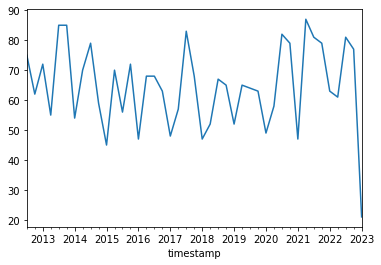

In [ ]:
quarterly_sum.plot()

In [ ]:
#apply the method above 
#result_df['borough'] = result_df.apply(lambda x:get_borough(x['latitude'], x['longitude']), axis=1).fillna(result_df['borough'])
#get the remaining NA
#sum(result_df['borough'].isna())

In [ ]:
#text processing
result_df['contributing_factor_vehicle_1'] = result_df['contributing_factor_vehicle_1'].replace('Illnes', 'Illness')

In [ ]:
#text processing
result_df['contributing_factor_vehicle_1'] = result_df['contributing_factor_vehicle_1'].replace('Drugs (Illegal)', 'Drugs (illegal)')

In [ ]:
#text processing
result_df['contributing_factor_vehicle_2'] = result_df['contributing_factor_vehicle_2'].replace('Illnes', 'Illness')
result_df['contributing_factor_vehicle_2'] = result_df['contributing_factor_vehicle_2'].replace('Drugs (Illegal)', 'Drugs (illegal)')

borough column is already filled using coordinate provided. However there are still some of them are null, which is because missing coordinates. we can delete them. Also, 1_vehicle_code1 to 5 are columns that are wrangled, which is ready to be used for analyzing vehicle types

In [ ]:
#rename columne name to be ready to use to_gbq
result_df = result_df.rename(columns = {'1_vehicle_code1':'vehicle_code_1_mod',
                            '1_vehicle_code2':'vehicle_code_2_mod',
                            '1_vehicle_code3':'vehicle_code_3_mod',
                            '1_vehicle_code4':'vehicle_code_4_mod',
                            '1_vehicle_code5':'vehicle_code_5_mod'})

In [ ]:
import pandas_gbq

In [ ]:
#drop na under borough since they are outside New York
#result_df.dropna(subset=['borough'], inplace=True)

In [ ]:
#check if there is any null value
#result_df['borough'].unique()

In [ ]:
#correct my input values for Staten Values
#result_df['borough'] = result_df['borough'].replace('STATEN', 'STATEN ISLAND')

In [ ]:
#check
#result_df['borough'].unique()

In [ ]:
#transfer the data to BigQuery
#pandas_gbq.to_gbq(result_df, destination_table = 'mydataset.mytable', project_id='ornate-ray-377720')

In [ ]:
from scipy.stats import ttest_ind

#group up electrified and non electronfied
mask_e = result_df[['vehicle_code_1_mod', 'vehicle_code_2_mod', 'vehicle_code_3_mod', 'vehicle_code_4_mod', 'vehicle_code_5_mod']].isin(['e-bike', 'e-scooter']).any(axis=1)
mask_ne = result_df[['vehicle_code_1_mod', 'vehicle_code_2_mod', 'vehicle_code_3_mod', 'vehicle_code_4_mod', 'vehicle_code_5_mod']].isin(['bike', 'scooter']).any(axis=1)
electrified = result_df[mask_e]
non_electrified = result_df[mask_ne]

#list out different categories
electrified_injured = electrified['number_of_persons_injured'].tolist()
non_electrified_injured = non_electrified['number_of_persons_injured'].tolist()
electrified_killed = electrified['number_of_persons_killed'].tolist()
non_electrified_killed = non_electrified['number_of_persons_killed'].tolist()

In [ ]:
#perform t test between these two factors
t_statistic_k, p_value_k = ttest_ind(electrified_killed, non_electrified_killed )

print('t-statistic for number of people killed between electrified bike and scooters and non-electrified bike and scooters:', t_statistic_k)
print('p-value:', p_value_k)

#perform t test between these two factors
t_statistic, p_value = ttest_ind(electrified_injured, non_electrified_injured )

print('t-statistic for number of people injured between electrified bike and scooters and non-electrified bike and scooters:', t_statistic)
print('p-value:', p_value)

t-statistic for number of people killed between electrified bike and scooters and non-electrified bike and scooters: 3.2437823237506596
p-value: 0.001180287365072677
t-statistic for number of people injured between electrified bike and scooters and non-electrified bike and scooters: 5.928153568722191
p-value: 3.0829856154007937e-09


In [ ]:
e_k = sum(electrified_killed)/len(electrified_killed)
ne_k = sum(non_electrified_killed)/len(non_electrified_killed)
e_i = sum(electrified_injured)/len(electrified_injured)
ne_i = sum(non_electrified_injured)/len(non_electrified_injured)

print('electrified death rate:',e_k)
print('non-electrified death rate:',ne_k)
print('electrified injury rate:',e_i)
print('non-electrified injury rate:',ne_i)

electrified death rate: 0.006065775755852526
non-electrified death rate: 0.0035255786811904297
electrified injury rate: 0.8627618235238366
non-electrified injury rate: 0.8322553977825325


In [ ]:
from scipy.stats import f_oneway

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


# Read the shapefile into a GeoDataFrame
boroughs = gpd.read_file('geo_export_ff72f602-2328-4f21-944f-a5b6bd9a8c25.shp')

# Convert the latitude and longitude columns to a Point geometry
geometry = [Point(xy) for xy in zip(result_df['longitude'], result_df['latitude'])]

# Create a GeoDataFrame from the DataFrame and Point geometry
gdf = gpd.GeoDataFrame(result_df, geometry=geometry, crs='EPSG:4326')

# Spatially join the data and the boroughs shapefile
merged = gpd.sjoin(gdf, boroughs, how='left', op='within')

# Get the borough name from the 'boroname' column in the merged GeoDataFrame
borough_name = merged['boro_name']

# Add the borough name column to the original DataFrame
result_df['borough_updated'] = borough_name

# Print the updated DataFrame
print(result_df.head())

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-33-00fe63512a8d>:16: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  merged = gpd.sjoin(gdf, boroughs, how='left', op='within')


  borough   contributing_factor_vehicle_1 contributing_factor_vehicle_2  \
0    None                     Unspecified                   Unspecified   
1    None  Driver Inattention/Distraction                   Unspecified   
2    None  Driver Inattention/Distraction                   Unspecified   
3    None           Following Too Closely                   Unspecified   
4    None  Reaction to Uninvolved Vehicle                   Unspecified   

  contributing_factor_vehicle_3 contributing_factor_vehicle_4  \
0                          None                          None   
1                          None                          None   
2                          None                          None   
3                          None                          None   
4                          None                          None   

  contributing_factor_vehicle_5      cross_street_name           timestamp  \
0                          None                   None 2016-09-05 22:00:00   
1 

In [ ]:
# Get the borough name from the 'boroname' column in the merged GeoDataFrame
borough_name = merged['boro_name']

# Add the borough name column to the original DataFrame
result_df['borough_updated'] = borough_name

# Print the updated DataFrame
sum(result_df['borough_updated'].isnull())

238356

In [ ]:
result_df[result_df['borough'].str.lower()!=result_df['borough_updated'].str.lower()]

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,vehicle_type_code_4,vehicle_type_code_5,zip_code,vehicle_code_1_mod,vehicle_code_2_mod,vehicle_code_3_mod,vehicle_code_4_mod,vehicle_code_5_mod,geometry,borough_updated
0,None,Unspecified,Unspecified,None,None,None,None,2016-09-05 22:00:00,NaN,NaN,...,None,None,<NA>,station wagon/sport utility vehicle,station wagon/sport utility vehicle,None,None,None,POINT EMPTY,NaN
1,None,Driver Inattention/Distraction,Unspecified,None,None,None,None,2016-07-04 08:00:00,NaN,NaN,...,None,None,<NA>,station wagon/sport utility vehicle,sedan,None,None,None,POINT EMPTY,NaN
2,None,Driver Inattention/Distraction,Unspecified,None,None,None,GRAND CENTRAL PARKWAY,2016-07-02 13:30:00,NaN,NaN,...,None,None,<NA>,sedan,sedan,None,None,None,POINT EMPTY,NaN
3,None,Following Too Closely,Unspecified,None,None,None,None,2016-06-28 19:31:00,NaN,NaN,...,None,None,<NA>,flat bed,truck,None,None,None,POINT EMPTY,NaN
4,None,Reaction to Uninvolved Vehicle,Unspecified,None,None,None,VANWYCK EXPRESSWAY,2016-06-08 08:45:00,NaN,NaN,...,None,None,<NA>,station wagon/sport utility vehicle,sedan,None,None,None,POINT EMPTY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968902,BROOKLYN,Passing Too Closely,Unspecified,None,None,None,None,2020-08-11 17:00:00,NaN,NaN,...,None,None,11249,station wagon/sport utility vehicle,station wagon/sport utility vehicle,None,None,None,POINT EMPTY,NaN
1968903,BROOKLYN,Backing Unsafely,Unspecified,None,None,None,None,2021-06-15 10:35:00,0.000000,0.000000,...,None,None,11249,sedan,None,None,None,None,POINT (0.00000 0.00000),NaN
1969047,QUEENS,Other Vehicular,Other Vehicular,None,None,None,None,2016-12-30 20:30:00,NaN,NaN,...,None,None,11001,sedan,sedan,None,None,None,POINT EMPTY,NaN
1969058,QUEENS,Unspecified,Unspecified,None,None,None,256 STREET,2013-09-27 11:00:00,40.727635,-73.708571,...,None,None,11001,sport utility / station wagon,sport utility / station wagon,None,None,None,POINT (-73.70857 40.72764),NaN


In [ ]:
result_df['geometry']

0                         POINT EMPTY
1                         POINT EMPTY
2                         POINT EMPTY
3                         POINT EMPTY
4                         POINT EMPTY
                      ...            
1969161    POINT (-73.70750 40.75269)
1969162    POINT (-73.72246 40.75334)
1969163    POINT (-73.70679 40.75335)
1969164    POINT (-73.70631 40.75381)
1969165    POINT (-73.71652 40.75922)
Name: geometry, Length: 1969166, dtype: geometry

In [ ]:
result_df = result_df.drop('geometry',axis = 1)

In [ ]:
def update_borough(df):
    """
    When the 'location' column is empty and the 'borough' and 'borough_updated' columns
    are not equal, set the value in 'borough_updated' to the value in 'borough'.
    """
    mask = (df['location'].isnull()) & (df['borough'] != df['borough_updated'])
    df.loc[mask, 'borough_updated'] = df.loc[mask, 'borough']

In [ ]:
update_borough(result_df)

In [ ]:
sum(result_df['borough_updated'].isnull())

202740

In [ ]:
len(result_df)

1969166

In [ ]:
#transfer the data to BigQuery
pandas_gbq.to_gbq(result_df, destination_table = 'mydataset.mytable', project_id='ornate-ray-377720', if_exists = 'replace')

KeyboardInterrupt: ignored

In [ ]:
sum(result_df['borough_updated'].isnull())

202740

In [ ]:
result_df['borough_updated'] = result_df['borough_updated'].str.upper()

In [ ]:
result_df['borough_updated'].unique()

array([None, 'BROOKLYN', 'QUEENS', nan, 'STATEN ISLAND', 'MANHATTAN',
       'BRONX'], dtype=object)

In [ ]:
result_df[result_df['number_of_persons_injured']>=1]

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,vehicle_code_1_mod,vehicle_code_2_mod,vehicle_code_3_mod,vehicle_code_4_mod,vehicle_code_5_mod,borough_updated
6,None,Unspecified,Unspecified,None,None,None,None,2016-04-21 08:27:00,NaN,NaN,...,None,None,None,<NA>,sedan,sedan,None,None,None,None
11,None,Unspecified,Unspecified,Unspecified,None,None,EAST 25 STREET,2022-07-07 23:38:00,NaN,NaN,...,None,None,None,<NA>,sedan,sedan,None,None,None,None
17,None,Turning Improperly,Other Vehicular,None,None,None,None,2015-12-08 20:39:00,NaN,NaN,...,None,None,None,<NA>,passenger vehicle,passenger vehicle,None,None,None,None
23,None,Fatigued/Drowsy,Unspecified,Unspecified,None,None,None,2015-06-24 07:10:00,NaN,NaN,...,passenger vehicle,None,None,<NA>,passenger vehicle,passenger vehicle,passenger vehicle,None,None,None
28,None,Alcohol Involvement,Driver Inattention/Distraction,None,None,None,None,2020-06-10 21:18:00,NaN,NaN,...,None,None,None,<NA>,sedan,sedan,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969131,QUEENS,Unspecified,Unspecified,None,None,None,267 STREET,2015-07-27 13:20:00,40.742567,-73.703345,...,None,None,None,11004,passenger vehicle,passenger vehicle,None,None,None,QUEENS
1969132,QUEENS,Failure to Yield Right-of-Way,Unspecified,None,None,None,266 STREET,2013-07-18 11:20:00,40.744152,-73.704930,...,None,None,None,11004,sport utility / station wagon,passenger vehicle,None,None,None,QUEENS
1969140,QUEENS,Turning Improperly,Unspecified,None,None,None,260 STREET,2014-10-09 19:00:00,40.737334,-73.708319,...,None,None,None,11004,passenger vehicle,passenger vehicle,None,None,None,QUEENS
1969154,QUEENS,Physical Disability,Unspecified,None,None,None,268 STREET,2012-12-22 15:40:00,40.744548,-73.703087,...,None,None,None,11004,passenger vehicle,passenger vehicle,None,None,None,QUEENS


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 79.0 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pmdarima as pm

In [ ]:
subset=result_df[(result_df['timestamp']>=pd.to_datetime('2020-01-01'))&(result_df['timestamp']<pd.to_datetime('2023-01-01'))]
subset=subset[['contributing_factor_vehicle_1','timestamp','number_of_persons_injured','number_of_persons_killed']]
subset.head()

,contributing_factor_vehicle_1,timestamp,number_of_persons_injured,number_of_persons_killed
8,Driver Inattention/Distraction,2021-05-21 08:40:00,0,0
9,Failure to Yield Right-of-Way,2021-07-06 21:50:00,0,0
10,Driver Inexperience,2021-08-14 01:53:00,0,0
11,Unspecified,2022-07-07 23:38:00,1,0
12,Following Too Closely,2022-03-14 07:14:00,0,0


In [ ]:
subset['dead_and_injured']=subset['number_of_persons_injured']+subset['number_of_persons_killed']
subset.head()

,contributing_factor_vehicle_1,timestamp,number_of_persons_injured,number_of_persons_killed,dead_and_injured
8,Driver Inattention/Distraction,2021-05-21 08:40:00,0,0,0
9,Failure to Yield Right-of-Way,2021-07-06 21:50:00,0,0,0
10,Driver Inexperience,2021-08-14 01:53:00,0,0,0
11,Unspecified,2022-07-07 23:38:00,1,0,1
12,Following Too Closely,2022-03-14 07:14:00,0,0,0


In [ ]:
data1=subset[subset['contributing_factor_vehicle_1']=='Passing or Lane Usage Improper']
data2=subset[subset['contributing_factor_vehicle_1']=='Unsafe Speed']
data3=subset[subset['contributing_factor_vehicle_1']=='Traffic Control Disregarded']

In [ ]:
subset['contributing_factor_vehicle_1'].unique()

array(['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Driver Inexperience', 'Unspecified', 'Following Too Closely',
       'Alcohol Involvement', 'Passing Too Closely', 'Oversized Vehicle',
       'Reaction to Uninvolved Vehicle', 'Unsafe Speed',
       'Turning Improperly', 'View Obstructed/Limited',
       'Tire Failure/Inadequate', 'Pavement Slippery',
       'Failure to Keep Right', 'Steering Failure', 'Other Vehicular',
       'Unsafe Lane Changing', 'Fell Asleep',
       'Passing or Lane Usage Improper', 'Traffic Control Disregarded',
       'Glare', 'Brakes Defective', 'Pavement Defective',
       'Lost Consciousness', 'Obstruction/Debris',
       'Traffic Control Device Improper/Non-Working',
       'Aggressive Driving/Road Rage', 'Backing Unsafely',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Fatigued/Drowsy', 'Driverless/Runaway Vehicle', None,
       'Tinted Windows', 'Drugs (illegal)', 'Tow Hitch Defective',
       'Ou

In [ ]:
data1=data1.set_index('timestamp')
data2=data2.set_index('timestamp')
data3=data3.set_index('timestamp')

In [ ]:
monthlydata1=data1.resample('1M').sum()
monthlydata2=data2.resample('1M').sum()
monthlydata3=data3.resample('1M').sum()

In [ ]:
monthlydata1.head()

,number_of_persons_injured,number_of_persons_killed,dead_and_injured
timestamp,,,
2020-01-31,81,0,81
2020-02-29,110,0,110
2020-03-31,53,0,53
2020-04-30,25,0,25
2020-05-31,50,0,50


In [ ]:
monthlydata2.head()

,number_of_persons_injured,number_of_persons_killed,dead_and_injured
timestamp,,,
2020-01-31,148,5,153
2020-02-29,138,4,142
2020-03-31,159,2,161
2020-04-30,114,7,121
2020-05-31,165,5,170


In [ ]:
monthlydata3.head()

,number_of_persons_injured,number_of_persons_killed,dead_and_injured
timestamp,,,
2020-01-31,136,1,137
2020-02-29,132,0,132
2020-03-31,95,1,96
2020-04-30,83,6,89
2020-05-31,143,1,144


In [ ]:
ts1=monthlydata1['dead_and_injured']
model1=pm.auto_arima(ts1,seasonal=True, m=12)
model1.fit(ts1)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [ ]:
forecasts1=model1.predict(n_periods=12)
forecasts1

2023-01-31    103.541930
2023-02-28    112.880998
2023-03-31    126.205668
2023-04-30    123.098216
2023-05-31    126.988590
2023-06-30    144.918328
2023-07-31    133.551228
2023-08-31    127.335243
2023-09-30    121.936179
2023-10-31    131.276057
2023-11-30    124.225196
2023-12-31    117.763532
Freq: M, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

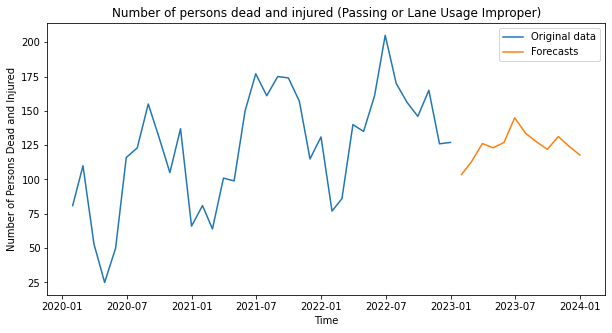

In [ ]:
# Plot the original data
plt.figure(figsize=(10, 5))

plt.plot(monthlydata1.index,ts1.tolist(), label='Original data')

# Plot the forecasts
plt.plot(forecasts1, label='Forecasts')

# Add a legend and show the plot
plt.title('Number of persons dead and injured (Passing or Lane Usage Improper)')
plt.xlabel('Time')
plt.ylabel('Number of Persons Dead and Injured')
plt.legend()
plt.show()

In [ ]:
ts2=monthlydata2['dead_and_injured']
model2=pm.auto_arima(ts2,seasonal=True, m=12)
model2.fit(ts2)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [ ]:
forecasts2=model2.predict(n_periods=12)
forecasts2

2023-01-31    185.889731
2023-02-28    201.495052
2023-03-31    205.134451
2023-04-30    207.642120
2023-05-31    198.205698
2023-06-30    205.443492
2023-07-31    233.901953
2023-08-31    215.015189
2023-09-30    202.609675
2023-10-31    210.105110
2023-11-30    198.604085
2023-12-31    198.768954
Freq: M, dtype: float64

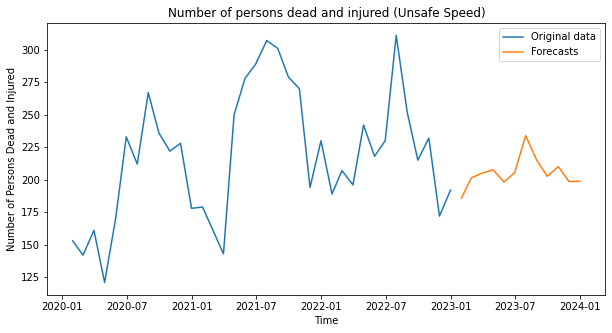

In [ ]:
# Plot the original data
plt.figure(figsize=(10, 5))

plt.plot(monthlydata2.index,ts2.tolist(), label='Original data')

# Plot the forecasts
plt.plot(forecasts2, label='Forecasts')

# Add a legend and show the plot
plt.title('Number of persons dead and injured (Unsafe Speed)')
plt.xlabel('Time')
plt.ylabel('Number of Persons Dead and Injured')
plt.legend()
plt.show()

In [ ]:
ts3=monthlydata3['dead_and_injured']
model3=pm.auto_arima(ts3,seasonal=True, m=12)
model3.fit(ts3)

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [ ]:
forecasts3=model3.predict(n_periods=12)
forecasts3

2023-01-31    204.521391
2023-02-28    204.499631
2023-03-31    203.397546
2023-04-30    201.772829
2023-05-31    200.129964
2023-06-30    198.827560
2023-07-31    198.044560
2023-08-31    197.795104
2023-09-30    197.974422
2023-10-31    198.416661
2023-11-30    198.948678
2023-12-31    199.429434
Freq: M, dtype: float64

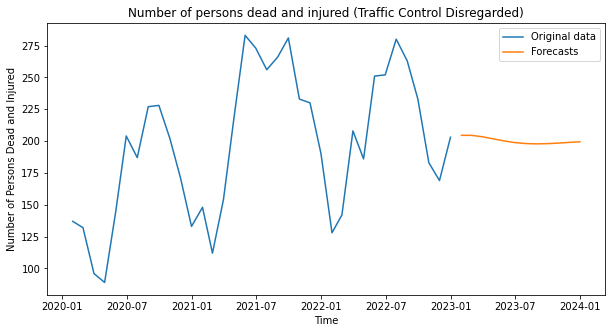

In [ ]:
# Plot the original data
plt.figure(figsize=(10, 5))

plt.plot(monthlydata3.index,ts3.tolist(), label='Original data')

# Plot the forecasts
plt.plot(forecasts3, label='Forecasts')

# Add a legend and show the plot
plt.title('Number of persons dead and injured (Traffic Control Disregarded)')
plt.xlabel('Time')
plt.ylabel('Number of Persons Dead and Injured')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

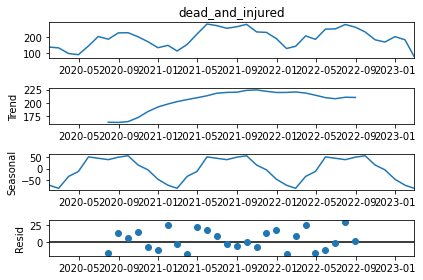

In [ ]:
decompose_data = seasonal_decompose(ts3, model="additive")
decompose_data.plot();

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import statsmodels.api as sm

In [ ]:
my_order = (2, 0, 0)
my_seasonal_order = (0, 1, 0, 12)
# define model
model4 = sm.tsa.statespace.SARIMAX(ts3.tolist(), order=my_order, seasonal_order=my_seasonal_order)
results=model4.fit()

In [ ]:
forecasts4=results.predict(start=37,end=48,dynamic=True)
forecasts4

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


array([152.27687113, 214.18155618, 189.62571298, 253.11202142,
       253.22791661, 280.71351868, 263.41454917, 233.2408398 ,
       183.13991854, 169.08128695, 203.04722434, 143.49223425])

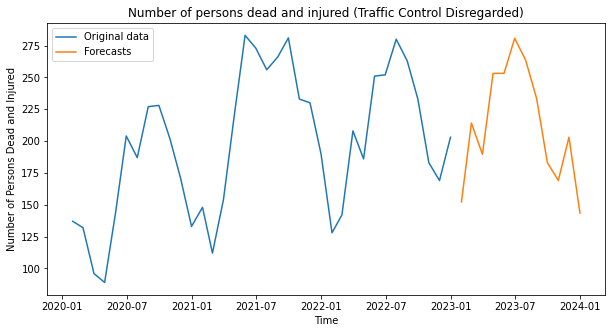

In [ ]:
# Plot the original data
plt.figure(figsize=(10, 5))

plt.plot(monthlydata3.index,ts3.tolist(), label='Original data')

# Plot the forecasts
plt.plot(forcast_index,forecasts4, label='Forecasts')

# Add a legend and show the plot
plt.title('Number of persons dead and injured (Traffic Control Disregarded)')
plt.xlabel('Time')
plt.ylabel('Number of Persons Dead and Injured')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
numdt=result_df[['timestamp','number_of_cyclist_injured','number_of_cyclist_killed','number_of_motorist_injured', 'number_of_motorist_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed', 'number_of_persons_injured', 'number_of_persons_killed']]

In [ ]:
numdt=numdt.set_index('timestamp')

In [ ]:
monthlynum=numdt.resample('1M').sum()

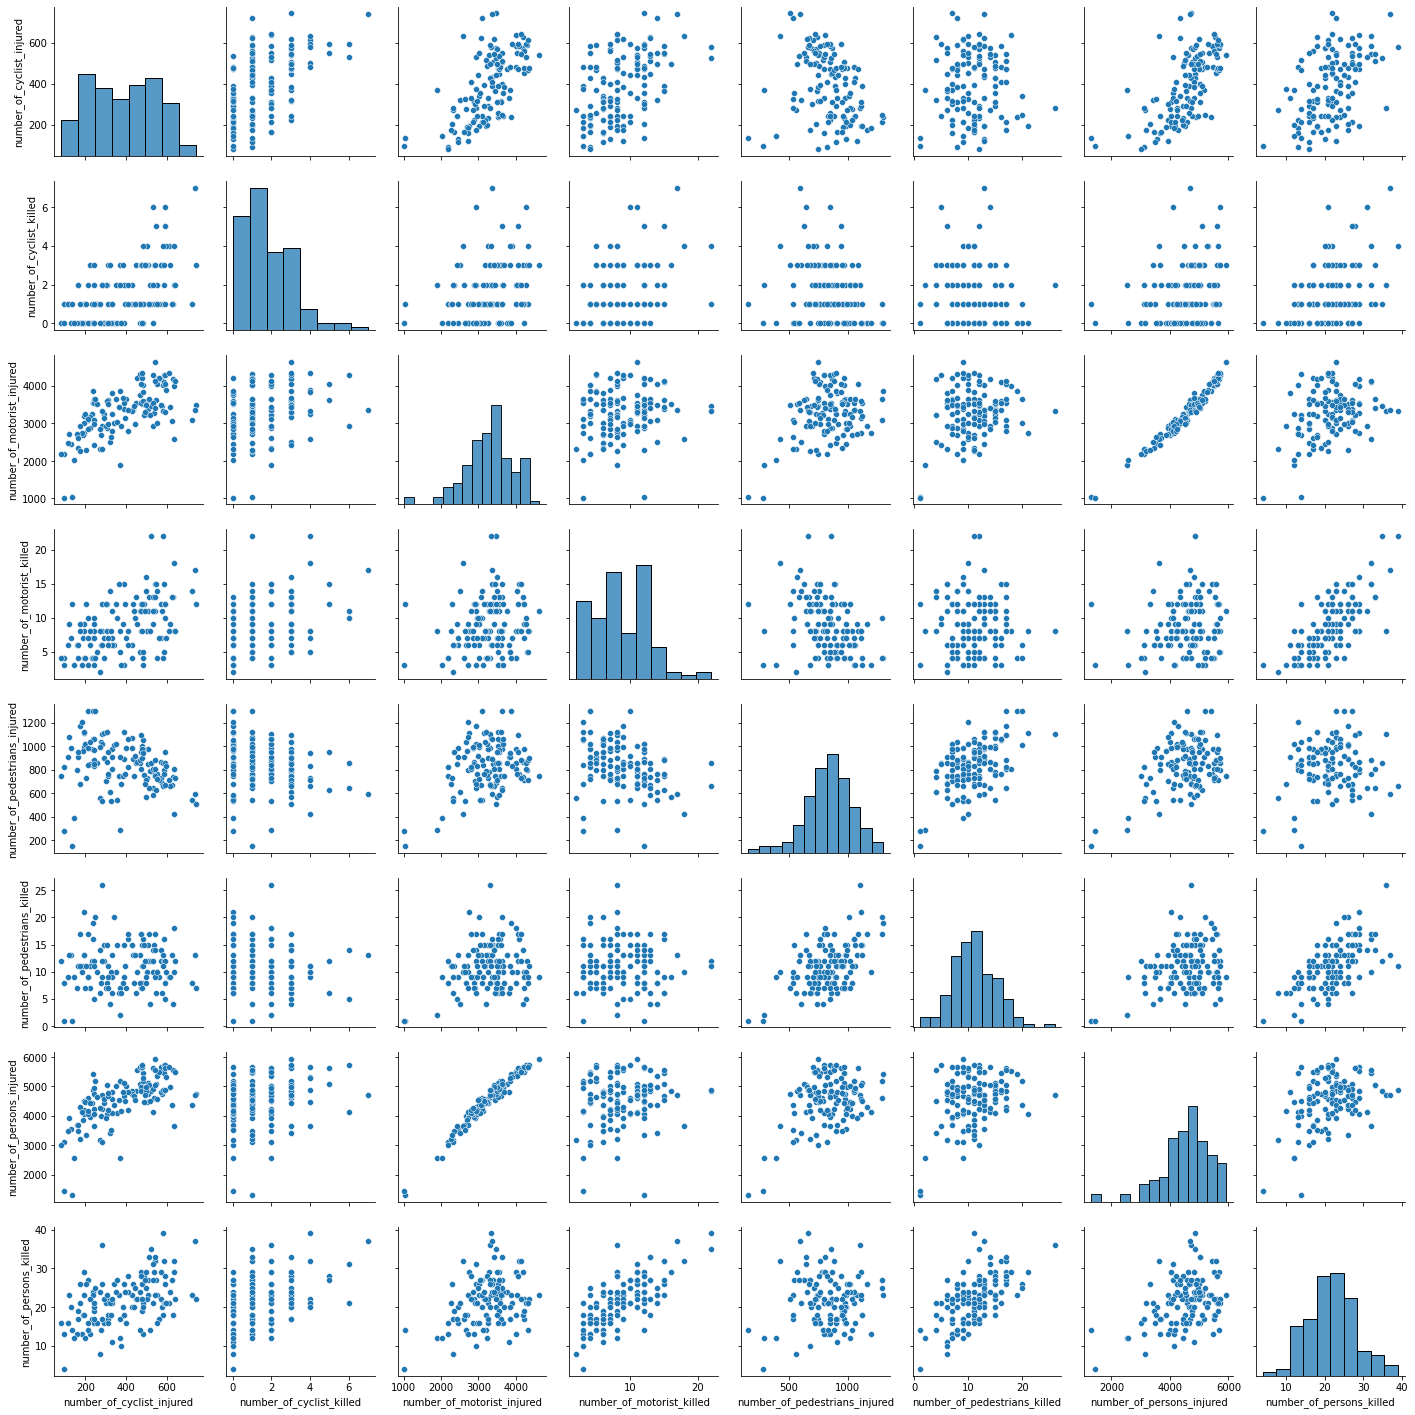

In [ ]:
sns.pairplot(monthlynum)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [ ]:
result_df.columns

Index(['borough', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'cross_street_name', 'timestamp', 'latitude', 'longitude', 'location',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_persons_injured', 'number_of_persons_killed',
       'off_street_name', 'on_street_name', 'unique_key', 'vehicle_type_code1',
       'vehicle_type_code2', 'vehicle_type_code_3', 'vehicle_type_code_4',
       'vehicle_type_code_5', 'zip_code', 'vehicle_code_1_mod',
       'vehicle_code_2_mod', 'vehicle_code_3_mod', 'vehicle_code_4_mod',
       'vehicle_code_5_mod', 'borough_updated'],
      dtype='object')

In [ ]:
zibi=result_df[['latitude','longitude','vehicle_code_1_mod']]
zibi = zibi.dropna()

In [ ]:
zibi['vehicle_code_1_mod'] = zibi['vehicle_code_1_mod'].replace('sedan', 1)
zibi['vehicle_code_1_mod'] = zibi['vehicle_code_1_mod'].replace('station wagon/sport utility vehicle', 2)
#zibi['vehicle_code_1_mod'] = zibi['vehicle_code_1_mod'].replace('passenger vehicle', 3)
#zibi['vehicle_code_1_mod'] = zibi['vehicle_code_1_mod'].replace('sport utility / station wagon', 4)
#zibi['vehicle_code_1_mod'] = zibi['vehicle_code_1_mod'].replace('truck', 5)
#zibi['vehicle_code_1_mod'] = zibi['vehicle_code_1_mod'].replace('cab', 6)


In [ ]:
zibi['vehicle_code_1_mod'] = pd.to_numeric(zibi['vehicle_code_1_mod'], errors='coerce')
zibi = zibi.dropna()

In [ ]:
zibi['vehicle_code_1_mod'].unique()

array([1.000000e+00, 2.000000e+00, 9.999000e+03, 2.000000e+03,
       0.000000e+00, 7.532433e+06, 9.990000e+02, 2.015000e+03,
       5.000000e+00, 7.000000e+00, 9.850000e+02, 9.940000e+02,
       1.972090e+05, 9.970000e+02, 1.111100e+04])

In [ ]:
zibi=zibi[(zibi['latitude']>35)&(zibi['latitude']<41.5)]

In [ ]:
zibi=zibi[(zibi['longitude']>-75)&(zibi['longitude']<-60)]

In [ ]:
zibi=zibi[zibi['vehicle_code_1_mod']<3]

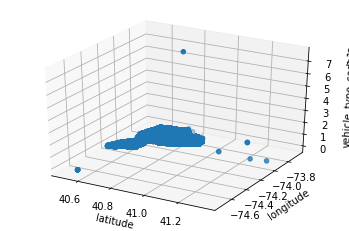

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zibi['latitude'], zibi['longitude'], zibi['vehicle_code_1_mod'])

# Set the axis labels
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('vehicle_type_code1')

# Show the plot
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(zibi)

KMeans(n_clusters=10)

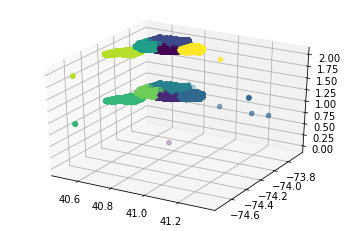

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zibi['latitude'], zibi['longitude'], zibi['vehicle_code_1_mod'], c=kmeans.labels_)
plt.show()

In [ ]:
kunan=result_df[['contributing_factor_vehicle_1','contributing_factor_vehicle_2','vehicle_code_1_mod']]
kunan=kunan.dropna()

In [ ]:
kunan['contributing_factor_vehicle_1'] = kunan['contributing_factor_vehicle_1'].replace('Driver Inattention/Distraction', 1)
kunan['contributing_factor_vehicle_1'] = kunan['contributing_factor_vehicle_1'].replace('Following Too Closely', 2)
kunan['contributing_factor_vehicle_1'] = kunan['contributing_factor_vehicle_1'].replace('Failure to Yield Right-of-Way', 3)
kunan['contributing_factor_vehicle_1'] = kunan['contributing_factor_vehicle_1'].replace('Backing Unsafely', 4)

In [ ]:
kunan['contributing_factor_vehicle_2'] = kunan['contributing_factor_vehicle_2'].replace('Driver Inattention/Distraction', 1)
kunan['contributing_factor_vehicle_2'] = kunan['contributing_factor_vehicle_2'].replace('Other Vehicular', 2)
kunan['contributing_factor_vehicle_2'] = kunan['contributing_factor_vehicle_2'].replace('Following Too Closely', 3)
kunan['contributing_factor_vehicle_2'] = kunan['contributing_factor_vehicle_2'].replace('Failure to Yield Right-of-Way', 4)

In [ ]:
kunan['vehicle_code_1_mod'] = kunan['vehicle_code_1_mod'].replace('sedan', 1)
kunan['vehicle_code_1_mod'] = kunan['vehicle_code_1_mod'].replace('station wagon/sport utility vehicle', 2)
kunan['vehicle_code_1_mod'] = kunan['vehicle_code_1_mod'].replace('passenger vehicle', 3)
kunan['vehicle_code_1_mod'] = kunan['vehicle_code_1_mod'].replace('sport utility / station wagon', 4)

In [ ]:
kunan['contributing_factor_vehicle_2'] = pd.to_numeric(kunan['contributing_factor_vehicle_2'], errors='coerce')
kunan['contributing_factor_vehicle_1'] = pd.to_numeric(kunan['contributing_factor_vehicle_1'], errors='coerce')
kunan['vehicle_code_1_mod'] = pd.to_numeric(kunan['vehicle_code_1_mod'], errors='coerce')
kunan = kunan.dropna()

In [ ]:
kunan=kunan[kunan['contributing_factor_vehicle_1']<5]
kunan=kunan[kunan['contributing_factor_vehicle_2']<5]


In [ ]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(kunan)

KMeans(n_clusters=2)

In [ ]:
%matplotlib inline
import plotly.express as px

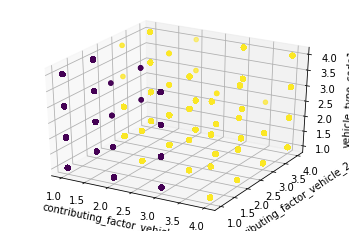

In [ ]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(kunan['contributing_factor_vehicle_1'], kunan['contributing_factor_vehicle_2'],kunan['vehicle_code_1_mod'], c=kmeans2.labels_)
ax.set_xlabel('contributing_factor_vehicle_1')
ax.set_ylabel('contributing_factor_vehicle_2')
ax.set_zlabel('vehicle_type_code1')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=2)
kmeans3.fit(kunan)

KMeans(n_clusters=2)

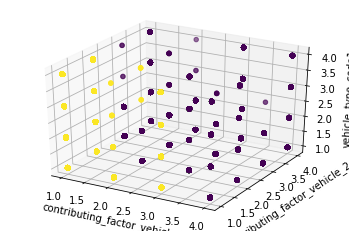

In [ ]:
fig3 = plt.figure()
ax = fig3.add_subplot(111, projection='3d')
ax.scatter(kunan['contributing_factor_vehicle_1'], kunan['contributing_factor_vehicle_2'],kunan['vehicle_code_1_mod'], c=kmeans3.labels_)
ax.set_xlabel('contributing_factor_vehicle_1')
ax.set_ylabel('contributing_factor_vehicle_2')
ax.set_zlabel('vehicle_type_code1')
plt.show()

In [ ]:
import plotly.graph_objs as go

x = kunan['contributing_factor_vehicle_1']
y = kunan['contributing_factor_vehicle_2']
z = kunan['vehicle_code_1_mod']

labels = kmeans3.labels_

trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        color=labels,
        size=5,
        line=dict(
            color=labels,
            width=0.5
        ),
        opacity=0.8
    )
)

layout = go.Layout(
    title='3D Scatter Plot with K-Means Clustering',
    scene=dict(
        xaxis=dict(title='contributing factor 1'),
        yaxis=dict(title='contributing factor 2'),
        zaxis=dict(title='Vehicle type')
    )
)

# Create the figure and show the plot
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [ ]:
def find_optimal_k(X, max_k):
    wss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wss.append(kmeans.inertia_)

    # Compute the first and second differences of the WSS curve
    first_diff = np.diff(wss)
    second_diff = np.diff(first_diff)

    # Find the index of the elbow point, which corresponds to the maximum second difference
    elbow_index = np.argmax(second_diff) + 2  # Add 2 because of the two differences taken

    return elbow_index


optimal_k = find_optimal_k(kunan, 10)
print('Optimal number of clusters:', optimal_k)

Optimal number of clusters: 2
